In [16]:
from numpy import vander, zeros, linspace, cumsum, arange, diff, array, shape, round, set_printoptions
from numpy.random import seed, choice
from scipy.linalg import pinv, hankel, svd, norm
from pandas import DataFrame, read_excel, options#.display.float_format
from matplotlib.pyplot import subplot, plot, xlim, title, xlabel, ylabel, axis, legend, show, gca, hist, spy
import graphviz
set_printoptions(precision=2)
options.display.float_format = '{:.2f}'.format

In [15]:
n_e = 200
A = array([[0.95, 0.04, 0, 0],[0.05, 0.85, 0, 0],[0, 0.1, 1, 0],[0, 0.01, 0, 1]])
x0 = array([1, 0, 0, 0])

#Generación de una muestra
muestra = zeros((4, n_e))
muestra[:, 0] = x0
for i in range(1, n_e, 1):
  x = A @ x0
  x0 = x
  muestra[:, i] = x

#Recuperación de la matriz
#A_rec: Matriz A recuperada
N_en = n_e - 100
A_rec = muestra[:, 1:(N_en + 1)] @ pinv(muestra[:, :N_en])
print(A_rec)
print(sum(A_rec)) #suma las columnas de la matriz A_rec

# Error - Norma de Frobenius para la diferencia
#entre la matriz original y
Err_Frob = norm(A - A_rec,'fro')
print(" \n Error - Norma de Frobenius:", Err_Frob)

[[ 9.50e-01  4.00e-02 -3.48e-16 -1.06e-16]
 [ 5.00e-02  8.50e-01 -6.11e-17 -1.94e-16]
 [-1.27e-15  1.00e-01  9.90e-01  9.90e-02]
 [-1.11e-16  1.00e-02  9.90e-02  9.90e-03]]
[1.   1.   1.09 0.11]
 
 Error - Norma de Frobenius: 1.0


(4, 200)
[[1.00e+00 9.50e-01 9.04e-01 8.63e-01 8.25e-01]
 [0.00e+00 5.00e-02 9.00e-02 1.22e-01 1.47e-01]
 [0.00e+00 0.00e+00 5.00e-03 1.40e-02 2.62e-02]
 [0.00e+00 0.00e+00 5.00e-04 1.40e-03 2.62e-03]]


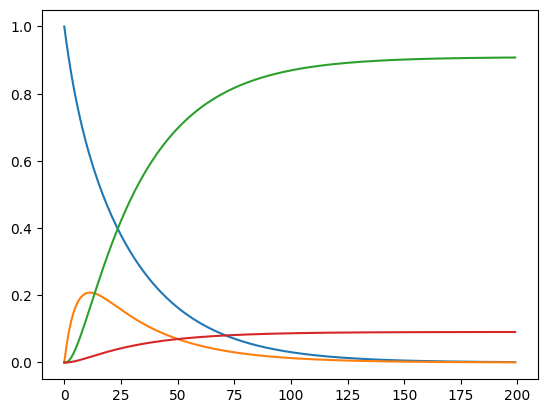

In [12]:
print(muestra.shape)
print(muestra[:,:5])
plot(muestra.T)

In [ ]:
# Para hacer el grafo

#crear un objeto de grafo graphviz
G = graphviz.Digraph('Epidemia')
# forma circular de nodos
G.attr('node', shape = 'circle')
# que se organice de izquierda a derecha
G.attr(rankdir='LR')
# agregando cada arista, automaticamente se generan los nodos
G.edge('S','S', label = '0.95')
G.edge('S','I', label = '0.05')
G.edge('I','S', label = '0.04')
G.edge('I','I', label = '0.85')
G.edge('I','R', label = '0.1')
G.edge('I','F', label = '0.01')
G.edge('R','R', label = '1')
G.edge('F','F', label = '1')
# solo para mostrar el grafo
G

In [ ]:
G.format = 'png'
G.render(directory='doctest-output', view=True)